<h1><b>Netflix Stock Price Prediction</b></h1>
<h2><u>Contexte</u></h2>
L'art de prévoir les prix des actions a été une tâche difficile pour de nombreux chercheurs et analystes. En fait, les investisseurs sont très intéressés par le domaine de recherche de la prévision des prix des actions. Pour un investissement réussi, de nombreux investisseurs sont désireux de connaître la situation future du marché boursier. Des systèmes de prédiction efficaces pour le marché boursier aident les négociants, les investisseurs et les analystes en leur fournissant des informations utiles comme la direction future du marché boursier.

In [123]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('archive/NFLX.csv')
df.shape

(1009, 7)

<h2><u>Pre-processing</u></h2>

In [125]:
print(df.isnull().sum())
print(df.info())
df.head()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [126]:
#transform colum Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


<h2><u>Visualisation</u></h2>

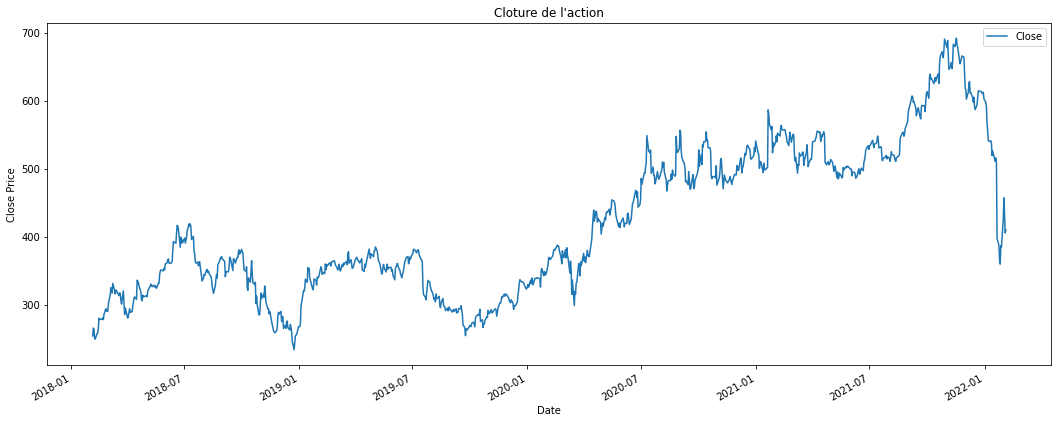

In [127]:
df.plot(x='Date', y=['Close'], figsize=(18,7))
plt.title("Cloture de l'action")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

<h2><u>MODELE LSTM</u></h2>
Pour prédire le cours de clôture de l'action (df['close']), nous utiliserons un programme de réseau neuronal récurrent artificiel appelé Mémoire Court et Long Terme (LSTM).<br>
LSTM sera utilisé ici a cause de sa capacité de traiter des problemes sequentiels<br>
Pour plus d'information sur LSTM <a href="https://medium.com/@pcomarimai/les-r%C3%A9seaux-de-neurones-r%C3%A9currents-%C3%A0-m%C3%A9moire-court-terme-et-long-terme-lstm-e8b4f83f4ab">Cliquez</a>

In [128]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [129]:
#creation d'un nouveau DataFrame contenant uniquement les 'Close'
data = df.filter(['Close'])
#convertir le DataFrame en un tableau numpy
dataset = data.values
#obtenir le nombre de lignes pour entrainer le modele
training_data_len = math.ceil( len(dataset) *.8) #---->80% du dataset pour le training, math.ceil() pour arrondir 
training_data_len

808

en pratique, il est presque toujours avantageux d'appliquer le prétraitement, donc je prétraite les transformations de mise à l'échelle ou de normalisation des données d'entrée avant qu'elles ne soient présentées à un réseau de neurones

In [130]:
#Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1)) #objet qui prend des valeurs aleatoire comprise entre ]0;1[
scaled_data = scaler.fit_transform(dataset) #creation d'un dataset de meme shape que 'dataset' et qui prendra des valeur comprise entre 0 et 1
dataset.shape
scaled_data.shape

(1009, 1)

In [131]:
#creation du dataset de training
#creation du scaled training dataset 
train_data = scaled_data[0:training_data_len , :] #Basé sur les 80%
#Diviser les données en x_train et y_train
x_train=[] #variable independante
y_train = [] #variable dependante

#-------------------<<revenir pas bien compris 
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])#Contient 60 valeur d'index de 0 à 59
    y_train.append(train_data[i,0])#contient les 61 premiere valeurs qui serons a la position 60
    if i<= 61: #
        print(x_train)
        print(y_train)
        print()

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

In [132]:
        
#convertir x_train et y_train en tableaux numpy pour pouvoir utiliser le modele LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

In [133]:

#Reshape les données
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(748, 60, 1)

<h2><u>Construction du Modele</u></h2>

7/7 [==============================] - 1s 27ms/step


C:\Users\CARLEL~1\AppData\Local\Temp/ipykernel_15892/2061819501.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


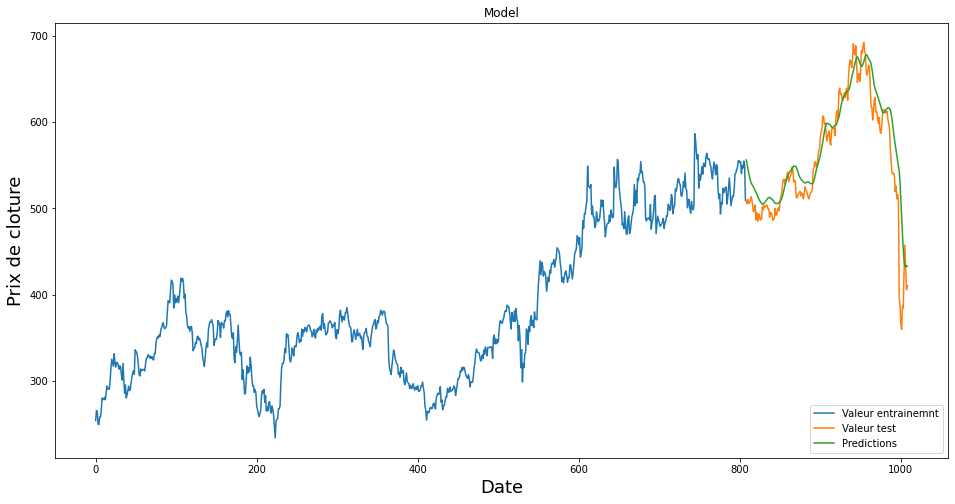

In [138]:
#creation du modele LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#compiler le modele
model.compile(optimizer='adam', loss='mean_squared_error')

#entrainer le modele
model.fit(x_train, y_train, batch_size=1, epochs=1)

#creation du dataset de test
#creation du scaled training dataset
test_data = scaled_data[training_data_len - 60: , :] #Basé sur les 20%
#Diviser les données en x_test et y_test
x_test = [] #variable independante
y_test =  dataset[training_data_len : , :] #variable dependant

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])#Contient 60 valeur d'index de 0 à 59
    
#convertir x_test et y_test en tableaux numpy pour pouvoir utiliser le modele LSTM
x_test = np.array(x_test)

#Reshape les données
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#obtenir les valeurs predites
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#inverser les valeurs predites

#evaluer le modele
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

#plot les données
train = data[:training_data_len]    
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualiser les données
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prix de cloture', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Valeur entrainemnt', 'Valeur test', 'Predictions'], loc='lower right')
plt.show()

In [135]:
#afficher les valeurs predites
valid

,Close,Predictions
808,508.779999,539.236084
809,505.549988,532.571289
810,510.299988,525.679077
811,505.549988,520.227661
812,506.519989,515.532715
...,...,...
1004,427.140015,406.235931
1005,457.130005,404.652527
1006,429.480011,411.354919
1007,405.600006,417.575195
